In [1]:
import pandas as pd

from trainging_func import train_and_tune_and_evaluate_model
from sklearn.ensemble import RandomForestClassifier

In [2]:
# import and set the data

df = pd.read_csv('company_bankruptcy.csv')
X = df.drop(['Bankrupt?'], axis=1)
y = df['Bankrupt?']

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


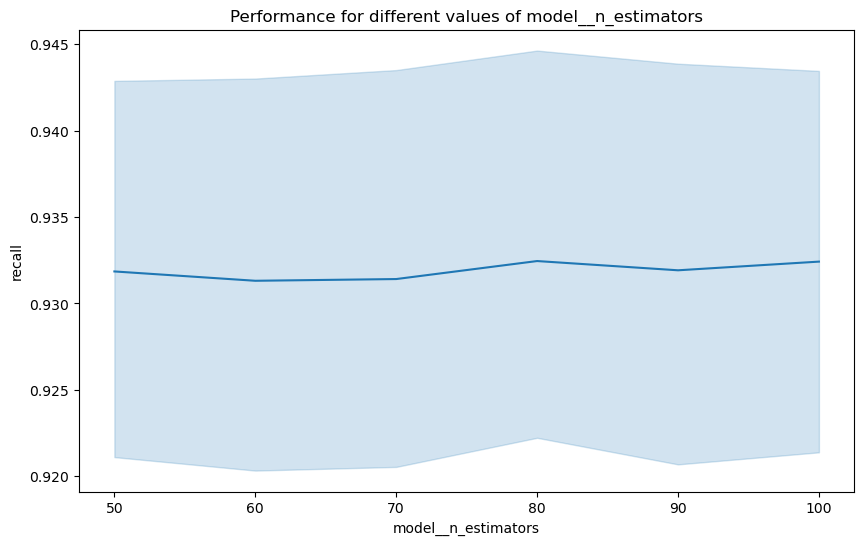

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


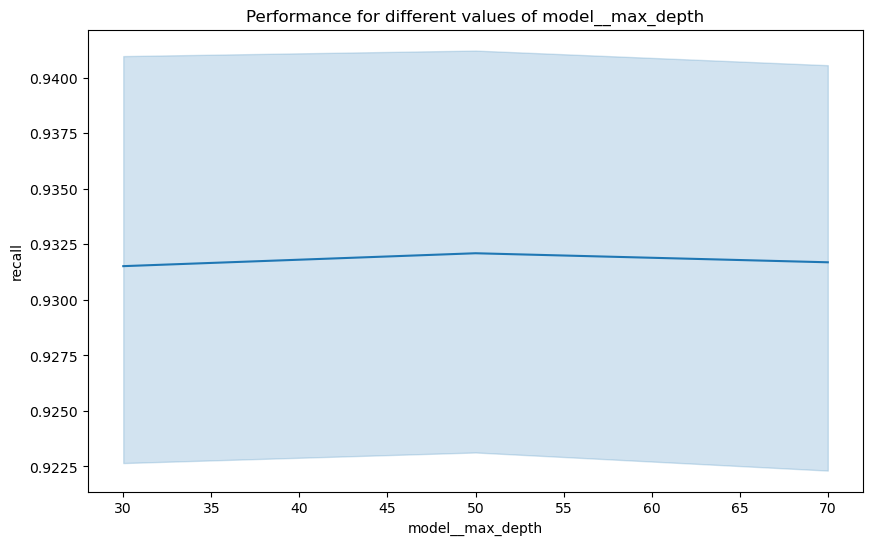

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


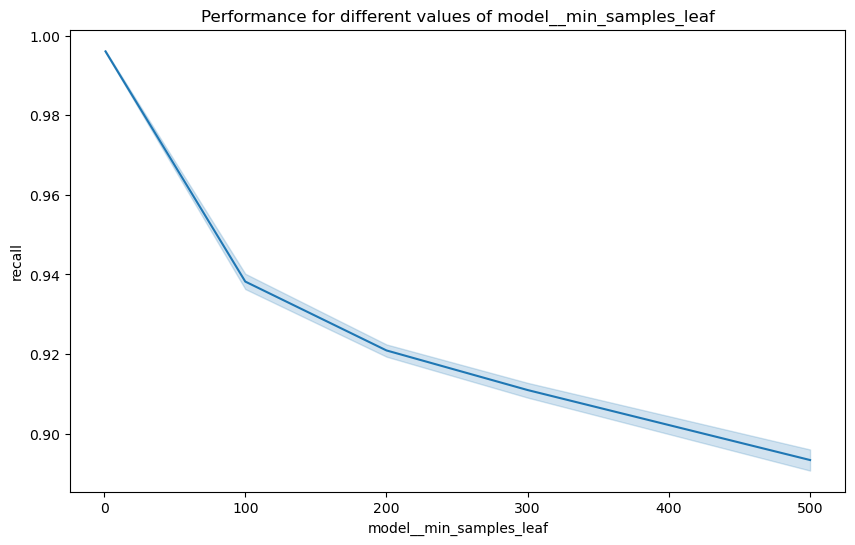

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


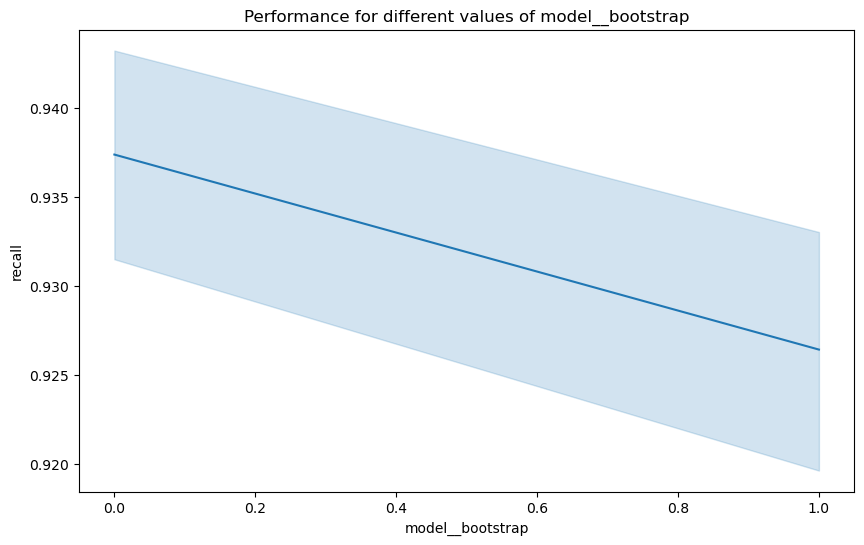

Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(bootstrap=False, max_depth=30,
                                        n_estimators=60, n_jobs=-1))])
Scores: {'accuracy': 0.9648093841642229, 'confusion_matrix': array([[1294,   26],
       [  22,   22]]), 'recall': 0.5, 'auc_roc': 0.9434056473829201}
Best Params: {'model__bootstrap': False, 'model__max_depth': 30, 'model__min_samples_leaf': 1, 'model__n_estimators': 60}


In [5]:
# train and tune and evaluate the model

param_grid = {
    'model__n_estimators': [50, 60, 70, 80, 90, 100],
    'model__max_depth': [None, 30, 50, 70],
    'model__min_samples_leaf': [1, 100, 200, 300, 500],
    'model__bootstrap': [True, False]
}

best_model_lr, scores_lr, best_params_lr = train_and_tune_and_evaluate_model(
    X = X,
    y = y,
    model = RandomForestClassifier( n_jobs=-1 ), # make sure to use all the cores of the CPU
    param_grid = param_grid,
    standardize = True,
    resample = True,
    scoring = 'recall',
    cv = 5,
    random_state = 42
)